In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [2]:
exchange_rates= pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

From the data above, there are 41 columns, 5698 rows, with the value type of 38 columns being object and 3 float  

#### Data Cleaning
Below, we do the following:

We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
We change the Time column to a datetime data type.
We sort the values by Time in ascending order.
We reset the index (and drop the initial index).

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
# Isolation of the Time and the US_dollar columns
euro_to_dollar = exchange_rates.copy()[['Time', 'US_dollar']]
print(euro_to_dollar.shape)

(5699, 2)


In [5]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.4094     1
0.8753     1
1.5928     1
1.3948     1
1.0650     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
# Drop all the rows where the - character appears in the US_dollar column. 
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] !='-']
print(euro_to_dollar.shape)

(5637, 2)


In [7]:
#Drop all the rows where the - character appears in the US_dollar column.
euro_to_dollar['US_dollar'].astype(float)

0       1.1789
1       1.1790
2       1.1743
3       1.1632
4       1.1659
         ...  
5694    1.2296
5695    1.2271
5696    1.2338
5697    1.2276
5698    1.2250
Name: US_dollar, Length: 5637, dtype: float64

#### Rolling Mean

In [8]:
#Calculating the rolling means for the US_dollar column using a moving window of 30 days.
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.iloc[28:31]

,Time,US_dollar,rolling_mean
28,1999-02-11,1.1312,NaN
29,1999-02-12,1.1244,1.150667
30,1999-02-15,1.1238,1.148830


#### Coming up with an Idea
We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

In [9]:
euro_to_dollar['Year'] = euro_to_dollar['Time'].dt.year
euro_to_dollar['Year'].value_counts().sort_index()

1999    259
2000    255
2001    254
2002    255
2003    255
2004    259
2005    257
2006    255
2007    255
2008    256
2009    256
2010    258
2011    257
2012    256
2013    255
2014    255
2015    256
2016    257
2017    255
2018    255
2019    255
2020    257
2021      5
Name: Year, dtype: int64

In [10]:
euro_to_dollar = euro_to_dollar.copy()[euro_to_dollar['rolling_mean']!=0]

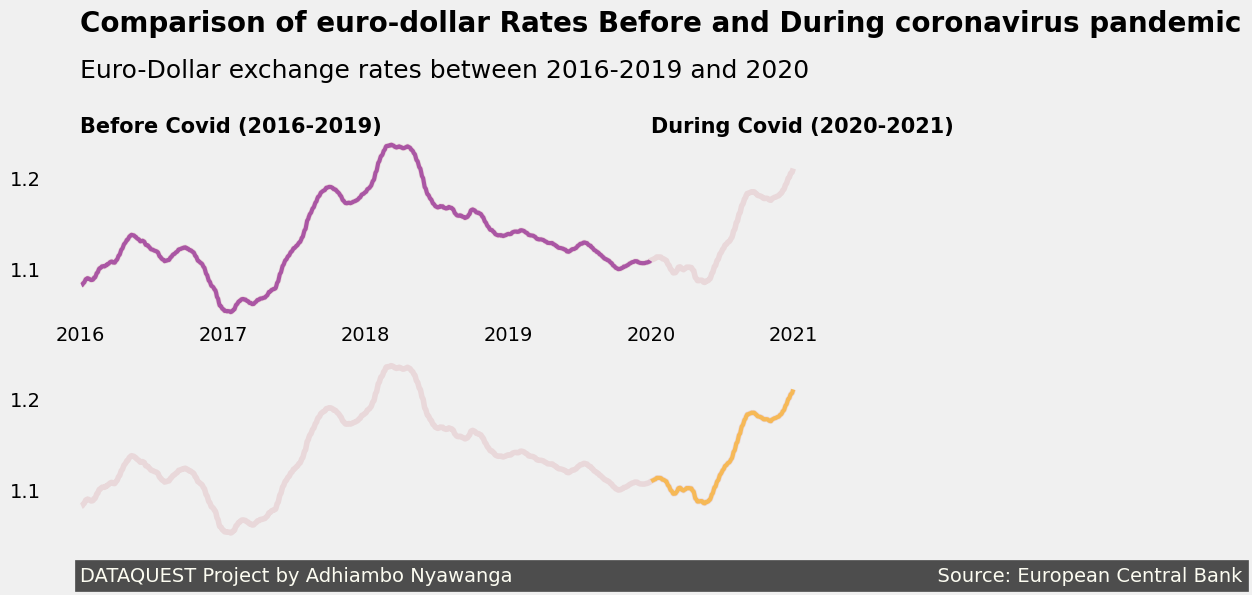

In [31]:
style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(9,5))

axes = [ax1, ax2]
for ax in axes:
    ax.plot(euro_to_dollar[euro_to_dollar['Year'].between(2016,2020,inclusive='left')]['Time'], euro_to_dollar[euro_to_dollar['Year'].between(2016,2020,inclusive='left')]['rolling_mean'], color ='#af0b1e', alpha = 0.1,)
    ax.grid(False)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(euro_to_dollar[euro_to_dollar['Year'].between(2016,2019,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2016,2019,inclusive='left')]['rolling_mean'],
         color='purple', alpha=.6,
         linewidth=3)
        
ax2.plot(euro_to_dollar[euro_to_dollar['Year'].between(2020,2020,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2020,2020,inclusive='left')]['rolling_mean'],
         color='orange', alpha=.6,
         linewidth=3) 
ax2.set_xticks([])
ax1.text(np.datetime64('2016-01-01 00:00:00'),1.36,
         s='Comparison of euro-dollar Rates Before and During coronavirus pandemic',
         size=20, weight = 'bold') 
ax1.text(np.datetime64('2016-01-01 00:00:00'),1.31,
         s='Euro-Dollar exchange rates between 2016-2019 and 2020',
         size=18) 
ax1.text(np.datetime64('2016-01-01 00:00:00'),1.25,
         s='Before Covid (2016-2019)',
         size=15, weight = 'bold') 
ax1.text(np.datetime64('2020-01-01 00:00:00'),1.25,
         s='During Covid (2020-2021)',
         size=15, weight ='bold')
ax2.text(np.datetime64('2016-01-01 00:00:00'), 1,
         backgroundcolor='#4d4d4d', color='#fcfcf1',
         s='DATAQUEST Project by Adhiambo Nyawanga' + ' '*68 + 'Source: European Central Bank')
      
plt.show()